In [129]:
# Observable Trends #1
#   Tweet Polarity based off recent events. Fluctuates everyday.

# Observable Trends #2
#   Based off the current data, it seems CBS is tweeting a more positive tweets and steering clear of what CNN, FOX, and NYT is reporting.

# Observable Trends #3
#   CNN and NYT tweeting could be tweeting similar stories/tweets as their tweet polarity is similar.

In [130]:
# Dependencies
import tweepy
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from config import consumer_key, consumer_secret, access_token, access_token_secret

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [131]:
target_users = ("@BBC","@CBS","@CNN","@FoxNews","@nytimes")

# Tweet Texts
tweet_texts = []

# List to hold results
results_list = []

#Loop through all news organizations
for target in target_users:

    # Variables for holding sentiments
    compound_list = []
    positive_list = []
    negative_list = []
    neutral_list = []
    number_list = []
    tweet_list = []
    
    counter = 0
    
    # Create a loop to iteratively run API requests
    for x in range(1, 6):

        # Get all tweets from home feed (for each page specified)
        public_tweets = api.user_timeline(target, page=x)

        # Loop through all tweets
        for tweet in public_tweets:
            
            # Run Vader Analysis on each tweet
            results = analyzer.polarity_scores(tweet["text"])
            compound = results["compound"]
            pos = results["pos"]
            neu = results["neu"]
            neg = results["neg"]
            
            # Add each value to the appropriate list
            compound_list.append(compound)
            positive_list.append(pos)
            negative_list.append(neg)
            neutral_list.append(neu)
            counter += 1
            number_list.append(counter)
            tweet_list.append(tweet["text"])
            
    sent ={
        "User": target,
        "Compound": compound_list,
        "Positive": positive_list,
        "Neutral": negative_list,
        "Negative": neutral_list,
        "Tweet Count": len(compound_list),
        "Number": number_list,
        "Tweets": tweet_list
        }
    
    # Append airline results to 'results_list'
    results_list.append(sent)
            

In [132]:
#Define variables for x and y values for scatter plot 
#BBCNews
y_bbc = results_list[0]["Compound"]
x_bbc = results_list[0]["Number"]

#CBS
y_cbs = results_list[1]["Compound"]
x_cbs = results_list[1]["Number"]

#CNN
y_cnn = results_list[2]["Compound"]
x_cnn = results_list[2]["Number"]

#FOXNews
y_fox = results_list[3]["Compound"]
x_fox = results_list[3]["Number"]

#nytimes
y_nyt = results_list[4]["Compound"]
x_nyt = results_list[4]["Number"]

In [133]:
news_df = pd.DataFrame(results_list).set_index("User")
news_df

,Compound,Negative,Neutral,Number,Positive,Tweet Count,Tweets
User,,,,,,,
@BBC,"[0.4404, -0.4215, 0.0, 0.4588, 0.7351, 0.4404,...","[0.861, 0.811, 1.0, 0.812, 0.744, 0.896, 0.909...","[0.0, 0.189, 0.0, 0.0, 0.0, 0.0, 0.091, 0.0, 0...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[0.139, 0.0, 0.0, 0.188, 0.256, 0.104, 0.0, 0....",100,[Can a change in home environment and parental...
@CBS,"[0.4389, 0.8442, 0.0, 0.296, 0.6809, 0.5574, 0...","[0.855, 0.676, 1.0, 0.891, 0.449, 0.805, 1.0, ...","[0.0, 0.0, 0.0, 0.0, 0.213, 0.0, 0.0, 0.0, 0.0...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[0.145, 0.324, 0.0, 0.109, 0.338, 0.195, 0.0, ...",100,"[Comedian, actor, and global superstar @KevinH..."
@CNN,"[0.0, 0.0, -0.8126, 0.1695, 0.0, 0.0, 0.4767, ...","[1.0, 1.0, 0.641, 0.926, 1.0, 1.0, 0.773, 1.0,...","[0.0, 0.0, 0.359, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[0.0, 0.0, 0.0, 0.074, 0.0, 0.0, 0.227, 0.0, 0...",100,[Mark Zuckerberg made $3 billion while he sat ...
@FoxNews,"[0.2023, 0.0, 0.0, 0.0, 0.4939, -0.2732, 0.0, ...","[0.87, 1.0, 1.0, 1.0, 0.714, 0.896, 1.0, 0.781...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.104, 0.0, 0.0, 0.1...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[0.13, 0.0, 0.0, 0.0, 0.286, 0.0, 0.0, 0.219, ...",100,[Trump directs top economic advisers to negoti...
@nytimes,"[0.0772, -0.4767, 0.128, 0.2732, 0.0, 0.0, -0....","[0.766, 0.664, 0.923, 0.884, 1.0, 1.0, 0.882, ...","[0.11, 0.244, 0.0, 0.0, 0.0, 0.0, 0.118, 0.134...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[0.124, 0.092, 0.077, 0.116, 0.0, 0.0, 0.0, 0....",100,[In Opinion\n\nOp-Ed Contributor Christopher B...


In [134]:
#save DataFrame to csv
news_df.to_csv("Sentiment_Data.csv")

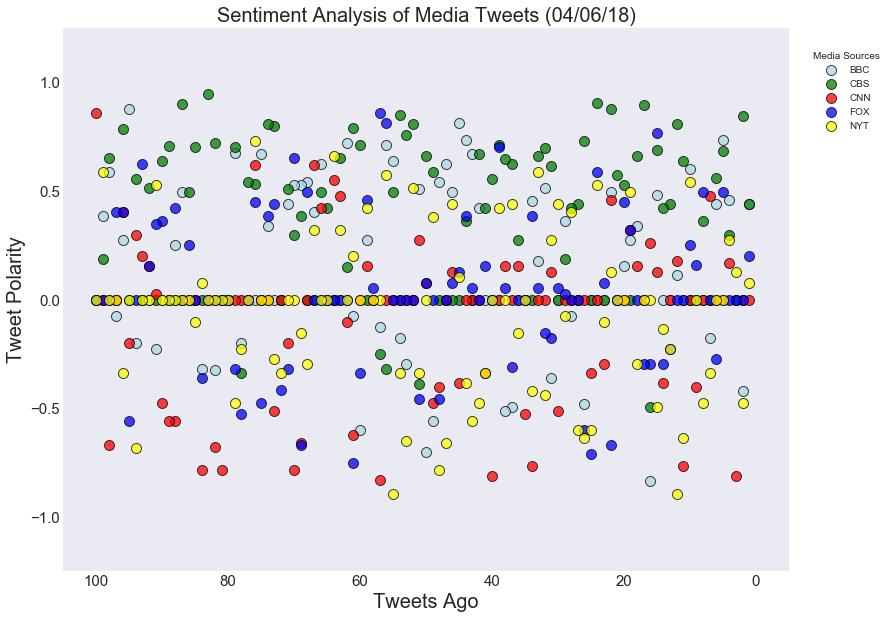

In [135]:

fix, ax  = plt.subplots(figsize =(13,10))

sns.set_style("darkgrid")

plt.ylim(-1.25,1.25)
plt.xlim(105,-5)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.xlabel("Tweets Ago", fontsize=20)
plt.ylabel("Tweet Polarity", fontsize=20)
plt.title("Sentiment Analysis of Media Tweets (04/06/18)", fontsize=20)

plt.scatter(x_bbc, y_bbc, marker="o", s=100, facecolors="lightblue", edgecolors="black", alpha=.75, label='BBC')
plt.scatter(x_cbs, y_cbs, marker="o", s=100, facecolors="green", edgecolors="black", alpha=0.75, label="CBS")
plt.scatter(x_cnn, y_cnn, marker="o", s=100, facecolors="red", edgecolors="black", alpha=0.75, label="CNN")
plt.scatter(x_fox, y_fox, marker="o", s=100, facecolors="blue", edgecolors="black", alpha=0.75, label="FOX")
plt.scatter(x_nyt, y_nyt, marker="o", s=100, facecolors="yellow", edgecolors="black", alpha=0.75, label="NYT")
plt.legend(title="Media Sources", fontsize=10, bbox_to_anchor=(1,1), loc=2, borderaxespad=2)

plt.savefig('news_scatterplot.png')

plt.show()

In [136]:
#Calculating compound average for tweet polarity

y_bbc = np.mean(results_list[0]["Compound"])
#x_bbc = results_list[0]["Text"]

#CBS
y_cbs = np.mean(results_list[1]["Compound"])
#x_cbs = results_list[1]["Number"]

#CNN
y_cnn = np.mean(results_list[2]["Compound"])
#x_cnn = results_list[2]["Number"]

#FOXNews
y_fox = np.mean(results_list[3]["Compound"])
#x_fox = results_list[3]["Number"]

#nytimes
y_nyt = np.mean(results_list[4]["Compound"])
#x_nyt = results_list[4]["Number"]

y_cities = [y_bbc, y_cbs, y_cnn, y_fox, y_nyt]
colors = ["lightblue","green","red","blue","yellow"]
media_names = ["BBC", "CBS", "CNN", "FOX", "NYT"]

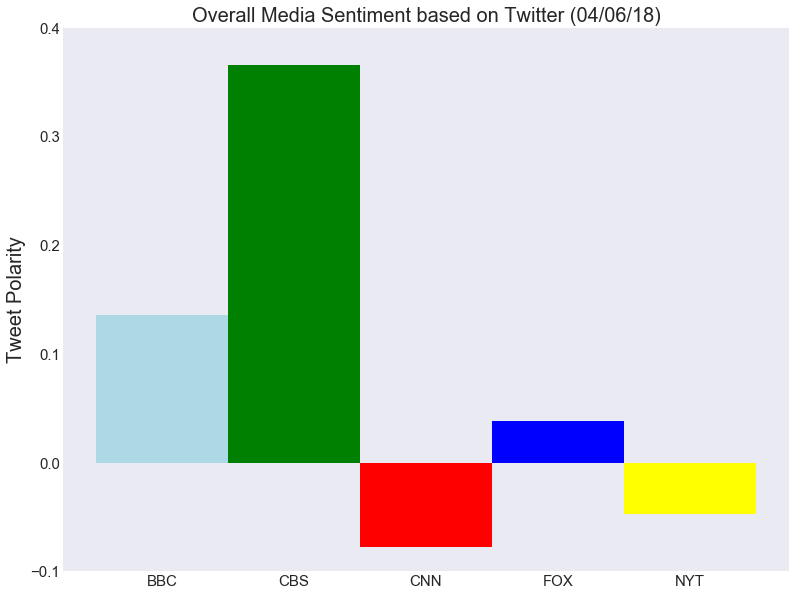

In [137]:
fig, ax  = plt.subplots(figsize =(13,10))

sns.set_style("dark")
ax.grid(False)

plt.ylim(-.1,.4)
#plt.xlim(105,-5)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.ylabel("Tweet Polarity", fontsize=20)
plt.title("Overall Media Sentiment based on Twitter (04/06/18)", fontsize=20)

y = plt.bar(media_names, y_cities, color=colors, align="center", width=1)

plt.savefig('news_barplot.png')

plt.show()
